# Moment/Cumulant Calculations and ICA on Asymmetrical nonG Field
#### Working with Gaussian random field (GRF) + asymmetrical nonG field

## Set parameters

In [36]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})
import matplotlib.gridspec as grd

# import nbodykit.lab as nbkt
import scipy.stats as stats
import scipy.interpolate as interpolate
import scipy.signal as signal

# import ica
import ica.modules.fields_nong as png
import ica.modules.fields_gauss as grf
import ica.modules.filters as flt

from ica.modules.jaafar import jaafar_fouriertransform as ft
from ica.modules.jaafar import jaafar_correlationfunctions as cf
# from ica.modules.jaafar import jaafar_filters as flt

In [37]:
# Parameters
logtwo_N = 20
N = 2**logtwo_N
BoxSize = 512.0
dx = BoxSize/N
h = 0.695
k0 = 0.02 
A0 = (7.96*10**-10)# * 2*np.pi**2)
ns = 0.965
seed = 50
dk = (2*np.pi) / BoxSize # Bin size (for power spectrum)
Pk = lambda k: A0*(k/k0)**(ns-1)*k**-3

# Other NG parameters
alpha = 1.0
nu = 2
c, w = 2, .2

# Generate the grfs using gaussianfield
g = grf.grf_zeta_1d(N, seed=seed)
f = grf.grf_zeta_1d(N, seed=10000)

## Generate nonG fields

In [40]:
# Generate nonG fields

# Extract the standard deviation of the gaussian fields
s = g.std()
sf = f.std()

# Generate the non-gaussian components that will be added to the gaussian fields
# Note that 'g' is the field used to generate the NG components, so the NG
# is correlated with 'g', and 'f' is a different Gaussian random field with
# which the NG is uncorrelated
NG_asymsinh = png.nong_map_asymsinh(g, nu*s, alpha) - g
# NG_symsinh = png.map_sinh(g, nu*s, alpha) - g
# NG_smooth_bump = png.map_smooth_bump(g, c, w) - g
# NG_squared = g**2 - g

# Generate the correlated NG zeta fields 
zeta_NG_asymsinh = g + NG_asymsinh
# zeta_NG_symsinh = g + NG_symsinh
# zeta_NG_smooth_bump = g + NG_smooth_bump
# zeta_NG_squared = g + g**2

# Generate the uncorrelated NG zeta fields 
zeta_NG_asymsinh_uncorr = f + NG_asymsinh
# zeta_NG_symsinh_uncorr = f + NG_symsinh
# zeta_NG_smooth_bump_uncorr = f + NG_smooth_bump
# zeta_NG_squared_uncorr = f + g**2

# Test the asymmetric sinh function applied to a linear function tf
tf = np.linspace(-4, 4, N)
zeta_NG_asymsinh_test = png.nong_map_asymsinh(tf, nu*s, alpha) - tf

# Generate gaussian distribution from mean and std of NG zeta fields
# ???

## Why are we getting an error for invalid value in power?

## Calculate and plot moments/cumulants for CORRELATED NG field

In [42]:
# Smooth the correlated nonG field and calculate cumulants and moments (1 to 4) in each band

# kc = np.arange(1, N//2+1, step=1000)
# kw = np.ones(np.shape(kc)) * 10
kc = np.logspace(0, logtwo_N-1, num=10, base=2.0)
kc_size = kc.size
fld_g = g
fld_ng = zeta_NG_asymsinh

cum1_g = np.zeros(np.shape(kc))
cum2_g = np.zeros(np.shape(kc))
cum3_g = np.zeros(np.shape(kc))
cum4_g = np.zeros(np.shape(kc))

cum1_ng = np.zeros(np.shape(kc))
cum2_ng = np.zeros(np.shape(kc))
cum3_ng = np.zeros(np.shape(kc))
cum4_ng = np.zeros(np.shape(kc))

cum1_g_ln = np.zeros(np.shape(kc))
cum2_g_ln = np.zeros(np.shape(kc))
cum3_g_ln = np.zeros(np.shape(kc))
cum4_g_ln = np.zeros(np.shape(kc))

cum1_ng_ln = np.zeros(np.shape(kc))
cum2_ng_ln = np.zeros(np.shape(kc))
cum3_ng_ln = np.zeros(np.shape(kc))
cum4_ng_ln = np.zeros(np.shape(kc))

mom1_g = np.zeros(np.shape(kc))
mom2_g = np.zeros(np.shape(kc))
mom3_g = np.zeros(np.shape(kc))
mom4_g = np.zeros(np.shape(kc))

mom1_ng = np.zeros(np.shape(kc))
mom2_ng = np.zeros(np.shape(kc))
mom3_ng = np.zeros(np.shape(kc))
mom4_ng = np.zeros(np.shape(kc))

mom1_g_ln = np.zeros(np.shape(kc))
mom2_g_ln = np.zeros(np.shape(kc))
mom3_g_ln = np.zeros(np.shape(kc))
mom4_g_ln = np.zeros(np.shape(kc))

mom1_ng_ln = np.zeros(np.shape(kc))
mom2_ng_ln = np.zeros(np.shape(kc))
mom3_ng_ln = np.zeros(np.shape(kc))
mom4_ng_ln = np.zeros(np.shape(kc))

zeta_smooth_gauss = np.zeros((kc_size, N))
zeta_smooth = np.zeros((kc_size, N))
zeta_smooth_ln = np.zeros((kc_size, N))

for i in np.arange(0, kc_size-1):

    zeta_smooth_gauss[i] = flt.window_tophat(fld_g, N, kc[i], kc[i+1])
    zeta_smooth[i] = flt.window_tophat(fld_ng, N, kc[i], kc[i+1])
#     zeta_smooth_ln[i], W_inv = flt.window_tophat_gauss_ln(zeta_NG_asymsinh, N, k, kw[i])
    
    cum1_ng[i] = stats.kstat(zeta_smooth[i], n=1)
    cum1_g[i] = stats.kstat(zeta_smooth_gauss[i], n=1)
    mom1_ng[i] = stats.moment(zeta_smooth[i], moment=1)
    mom1_g[i] = stats.moment(zeta_smooth_gauss[i], moment=1)
    
    cum2_ng[i] = stats.kstat(zeta_smooth[i], n=2)
    cum2_g[i] = stats.kstat(zeta_smooth_gauss[i], n=2)
    mom2_ng[i] = stats.moment(zeta_smooth[i], moment=2)
    mom2_g[i] = stats.moment(zeta_smooth_gauss[i], moment=2)
    
    cum3_ng[i] = stats.kstat(zeta_smooth[i], n=3)
    cum3_g[i] = stats.kstat(zeta_smooth_gauss[i], n=3)
    mom3_ng[i] = stats.moment(zeta_smooth[i], moment=3)
    mom3_g[i] = stats.moment(zeta_smooth_gauss[i], moment=3)
    
    cum4_ng[i] = stats.kstat(zeta_smooth[i], n=4)
    cum4_g[i] = stats.kstat(zeta_smooth_gauss[i], n=4)
    mom4_ng[i] = stats.moment(zeta_smooth[i], moment=4)
    mom4_g[i] = stats.moment(zeta_smooth_gauss[i], moment=4)


x[0] before: 2.0747847884194925e-12
x[0] after: 2.0747847884194925e-12
x[0] before: 35798.42735193283
x[0] after: 35798.42735193283
x[0] before: 2.0747847884194925e-12
x[0] after: 2.0747847884194925e-12
x[0] before: 35798.42735193283
x[0] after: 35798.42735193283
x[0] before: 2.0747847884194925e-12
x[0] after: 2.0747847884194925e-12
x[0] before: 35798.42735193283
x[0] after: 35798.42735193283
x[0] before: 2.0747847884194925e-12
x[0] after: 2.0747847884194925e-12
x[0] before: 35798.42735193283
x[0] after: 35798.42735193283
x[0] before: 2.0747847884194925e-12
x[0] after: 2.0747847884194925e-12
x[0] before: 35798.42735193283
x[0] after: 35798.42735193283
x[0] before: 2.0747847884194925e-12
x[0] after: 2.0747847884194925e-12
x[0] before: 35798.42735193283
x[0] after: 35798.42735193283
x[0] before: 2.0747847884194925e-12
x[0] after: 2.0747847884194925e-12
x[0] before: 35798.42735193283
x[0] after: 35798.42735193283
x[0] before: 2.0747847884194925e-12
x[0] after: 2.0747847884194925e-12
x[0] 

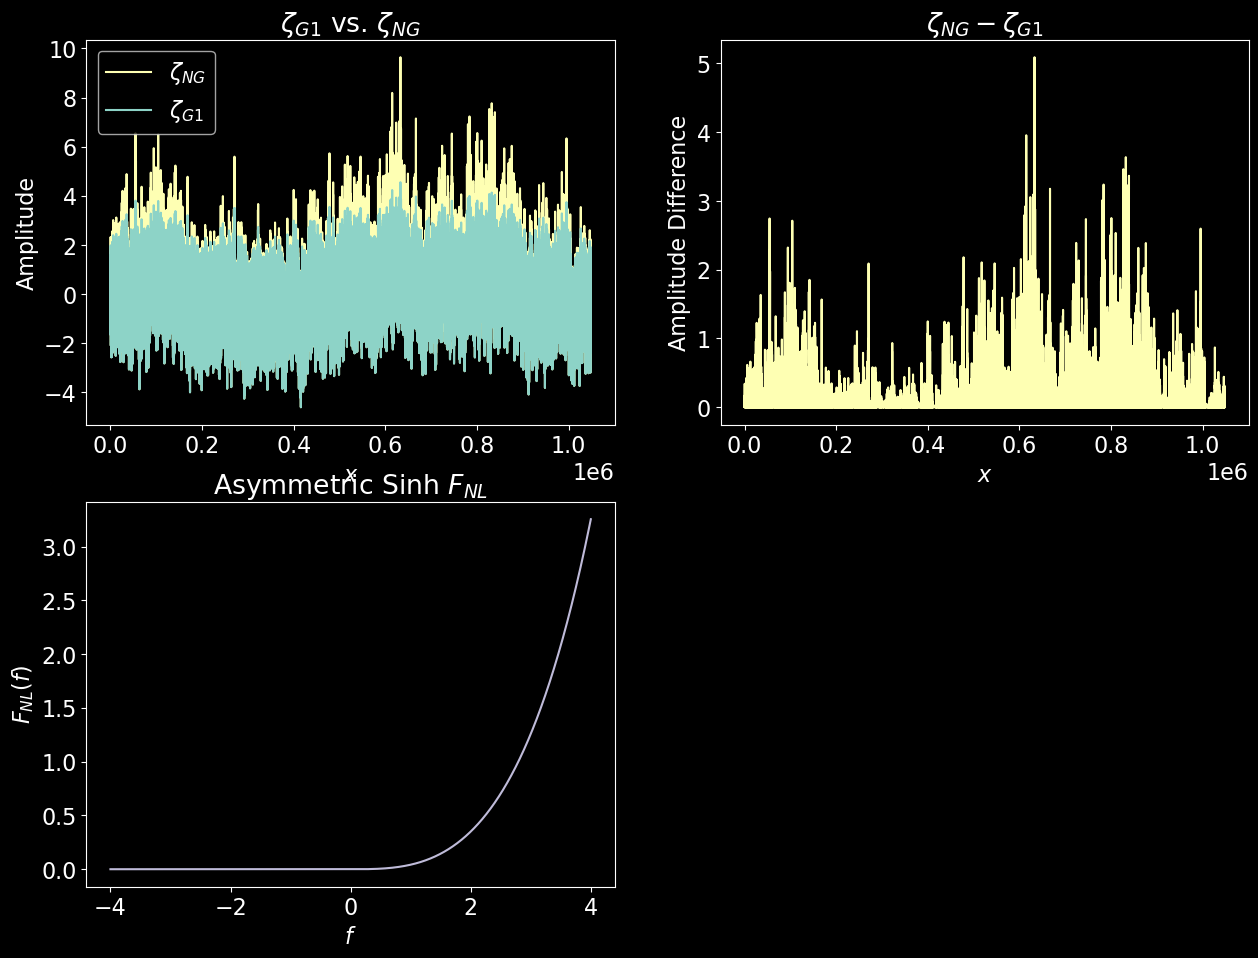

In [43]:
# Plot correlated G field, NG field, and F_nl

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(15,11))

# fld_g = g
# fld_ng = zeta_NG_asymsinh
fld_xax = np.arange(0, N)
fld_diff = zeta_NG_asymsinh - g

ax1.set_title(r'$\zeta_{G1}$ vs. $\zeta_{NG}$')
ax1.plot(fld_xax, fld_ng, label=r'$\zeta_{NG}$', color='C1')
ax1.plot(fld_xax, fld_g, label=r'$\zeta_{G1}$')
ax1.legend(loc='upper left')
ax1.set(xlabel=r'$x$', ylabel="Amplitude")

ax2.set_title(r'$\zeta_{NG} - \zeta_{G1}$')
ax2.plot(fld_xax, fld_diff, color='C1')
ax2.set(xlabel=r'$x$', ylabel="Amplitude Difference")

ax3.set_title("Asymmetric Sinh "r'$F_{NL}$')
ax3.plot(tf, zeta_NG_asymsinh_test, label=r'$\zeta_{NG}$', color='C2')
ax3.set(xlabel=r'$f$', ylabel=r'$F_{NL}(f)$')

ax4.set_visible(False)

plt.savefig('CorrNG_Fields.png')

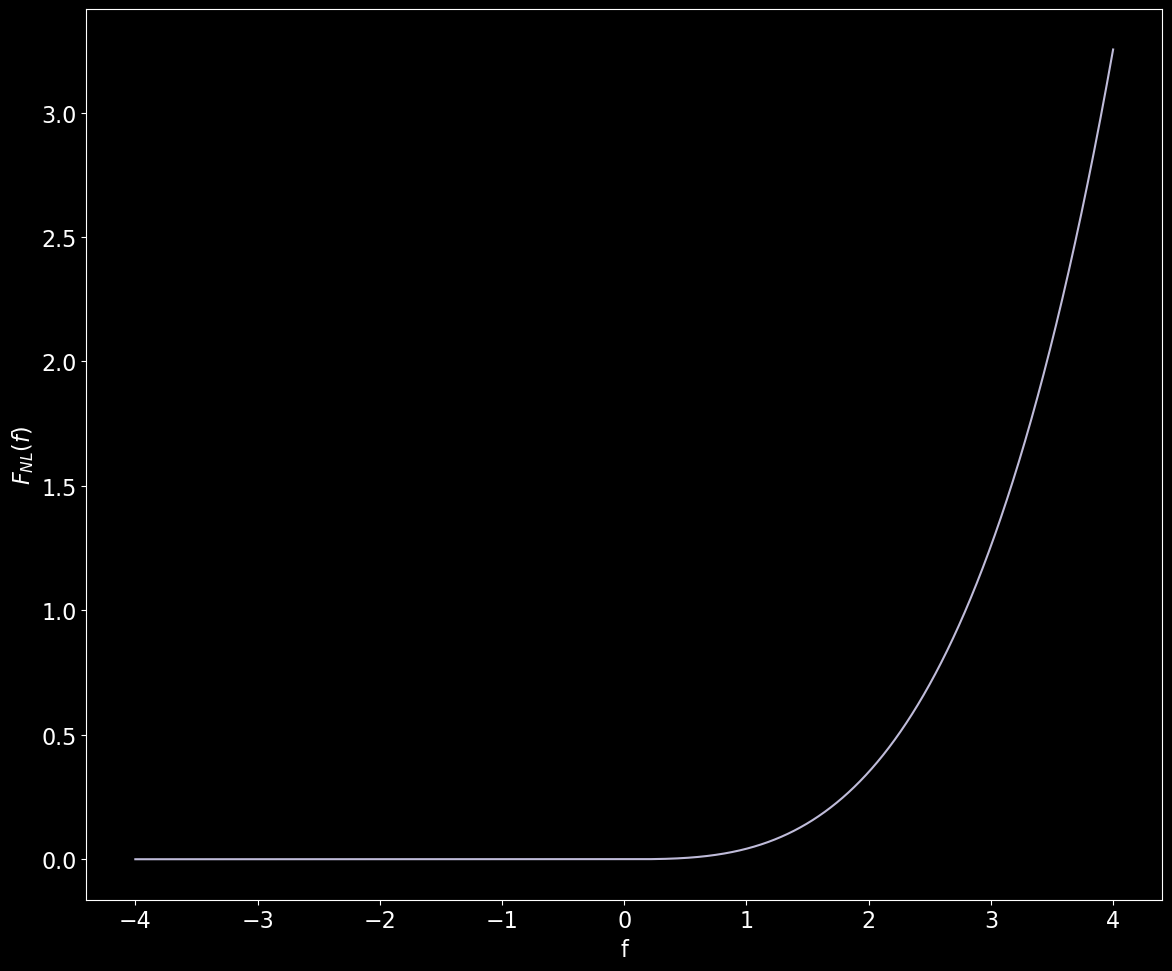

In [44]:
fig, ax = plt.subplots(1, figsize=(12,10))

ax.plot(tf, zeta_NG_asymsinh_test, color='C2')
ax.set(xlabel="f", ylabel=r'$F_{NL}(f)$')
fig.tight_layout()

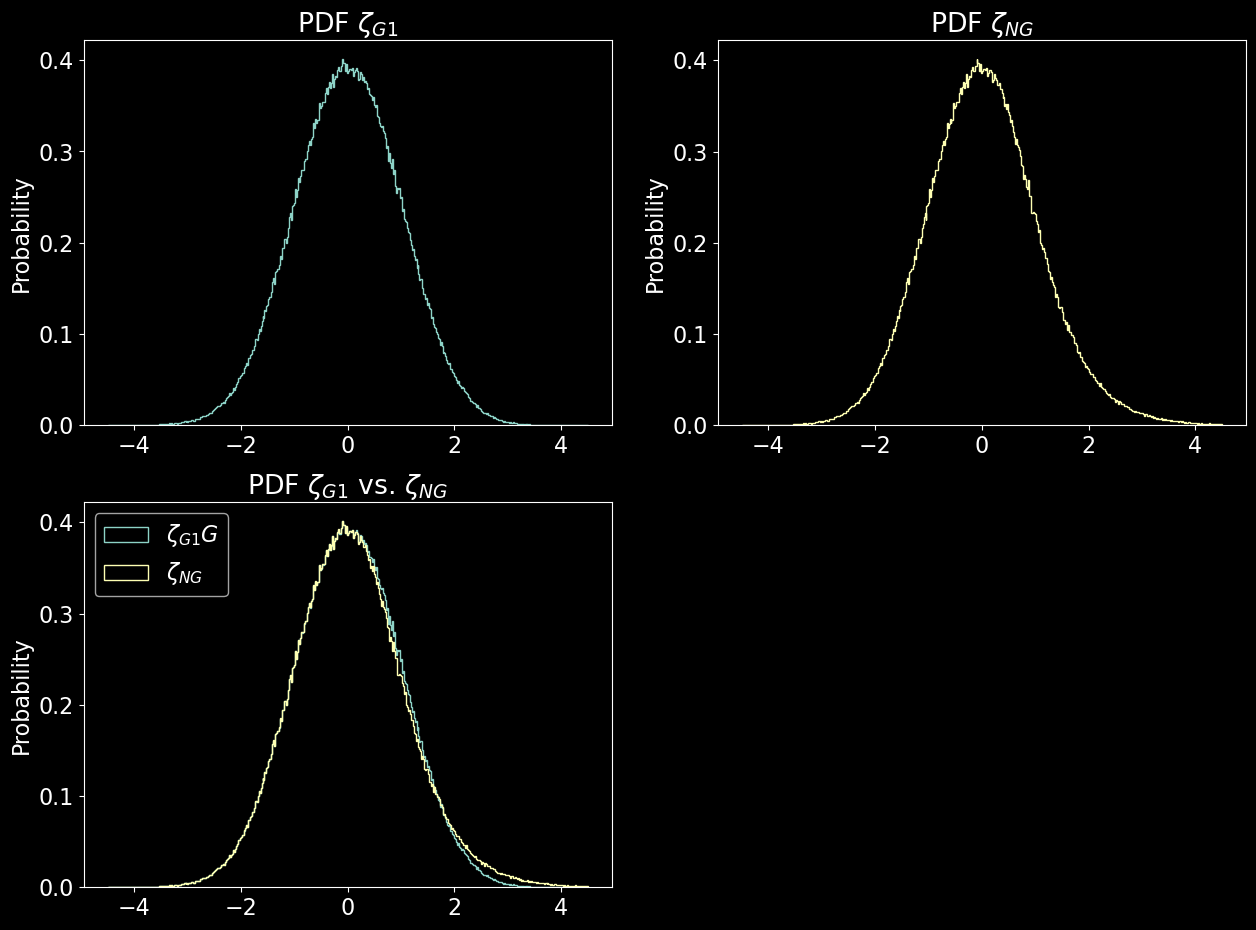

In [45]:
# Plot PDFs for correlated G and NG fields

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(15,11))

# fld_g = g
# fld_ng = zeta_NG_asymsinh
hist_binvalues = np.linspace(-4.5, 4.5, 500)

ax1.set_title(r'PDF $\zeta_{G1}$')
ax1.hist(fld_g, bins=hist_binvalues, density=True, histtype='step')
ax1.set(ylabel="Probability")

ax2.set_title(r'PDF $\zeta_{NG}$')
ax2.hist(fld_ng, bins=hist_binvalues, density=True, histtype='step', color='C1')
ax2.set(ylabel="Probability")

ax3.set_title(r'PDF $\zeta_{G1}$ vs. $\zeta_{NG}$')
ax3.hist(fld_g, bins=hist_binvalues, density=True, label=r'$\zeta_{G1}G$', histtype='step')
ax3.hist(fld_ng, bins=hist_binvalues, density=True, label=r'$\zeta_{NG}$', histtype='step', color='C1')
ax3.legend(loc='upper left')
ax3.set(ylabel=r"Probability")

ax4.set_visible(False)

plt.savefig('CorrNG_PDFs.png')

corr_g = fld_g
corr_ng = fld_ng

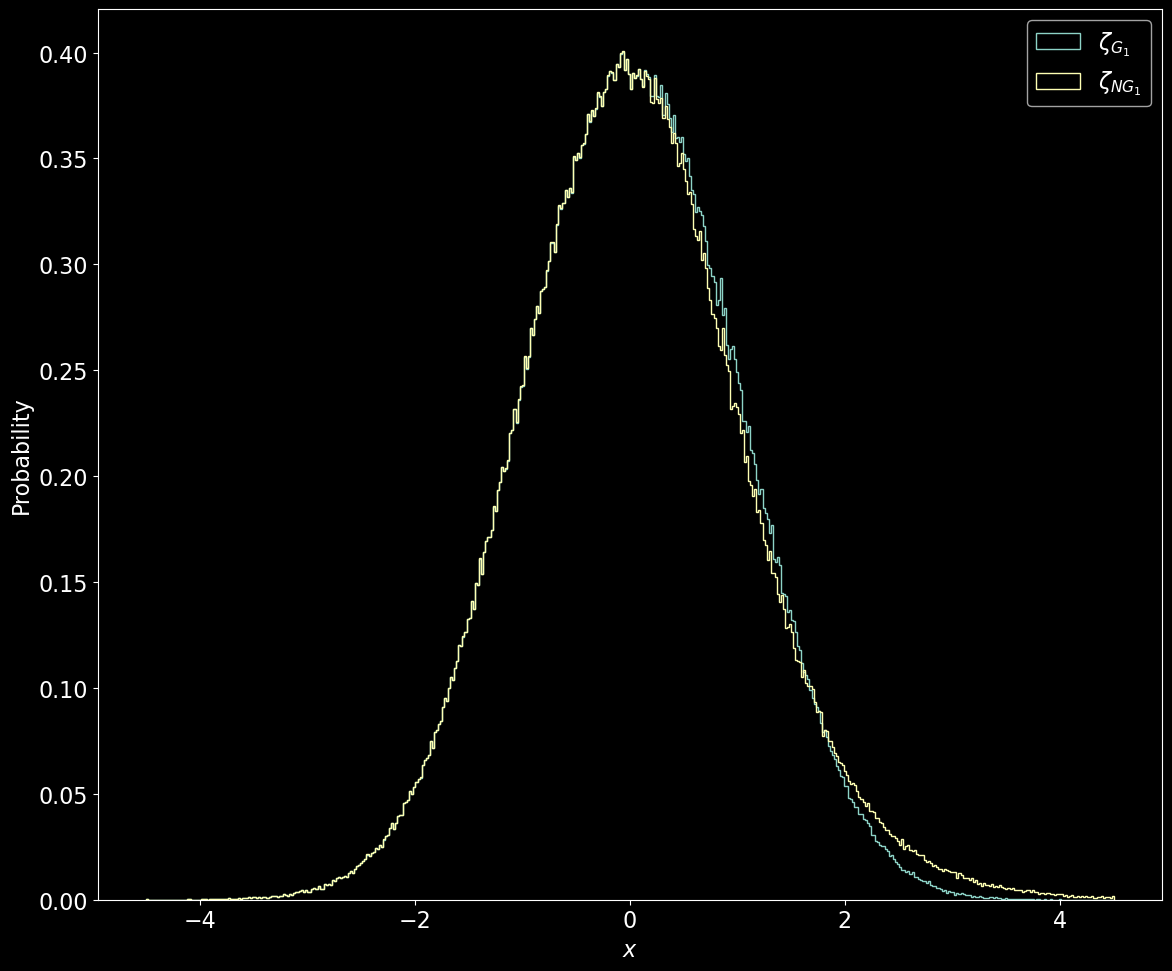

In [46]:
hist_binvalues = np.linspace(-4.5, 4.5, 475)
fig, ax = plt.subplots(1, figsize=(12,10))

ax.hist(fld_g, bins=hist_binvalues, density=True, label=r'$\zeta_{G_1}$', histtype='step')
ax.hist(fld_ng, bins=hist_binvalues, density=True, label=r'$\zeta_{NG_1}$', histtype='step', color='C1')
ax.legend()
ax.set(ylabel=r"Probability")
ax.set(xlabel="$x$")
fig.tight_layout()

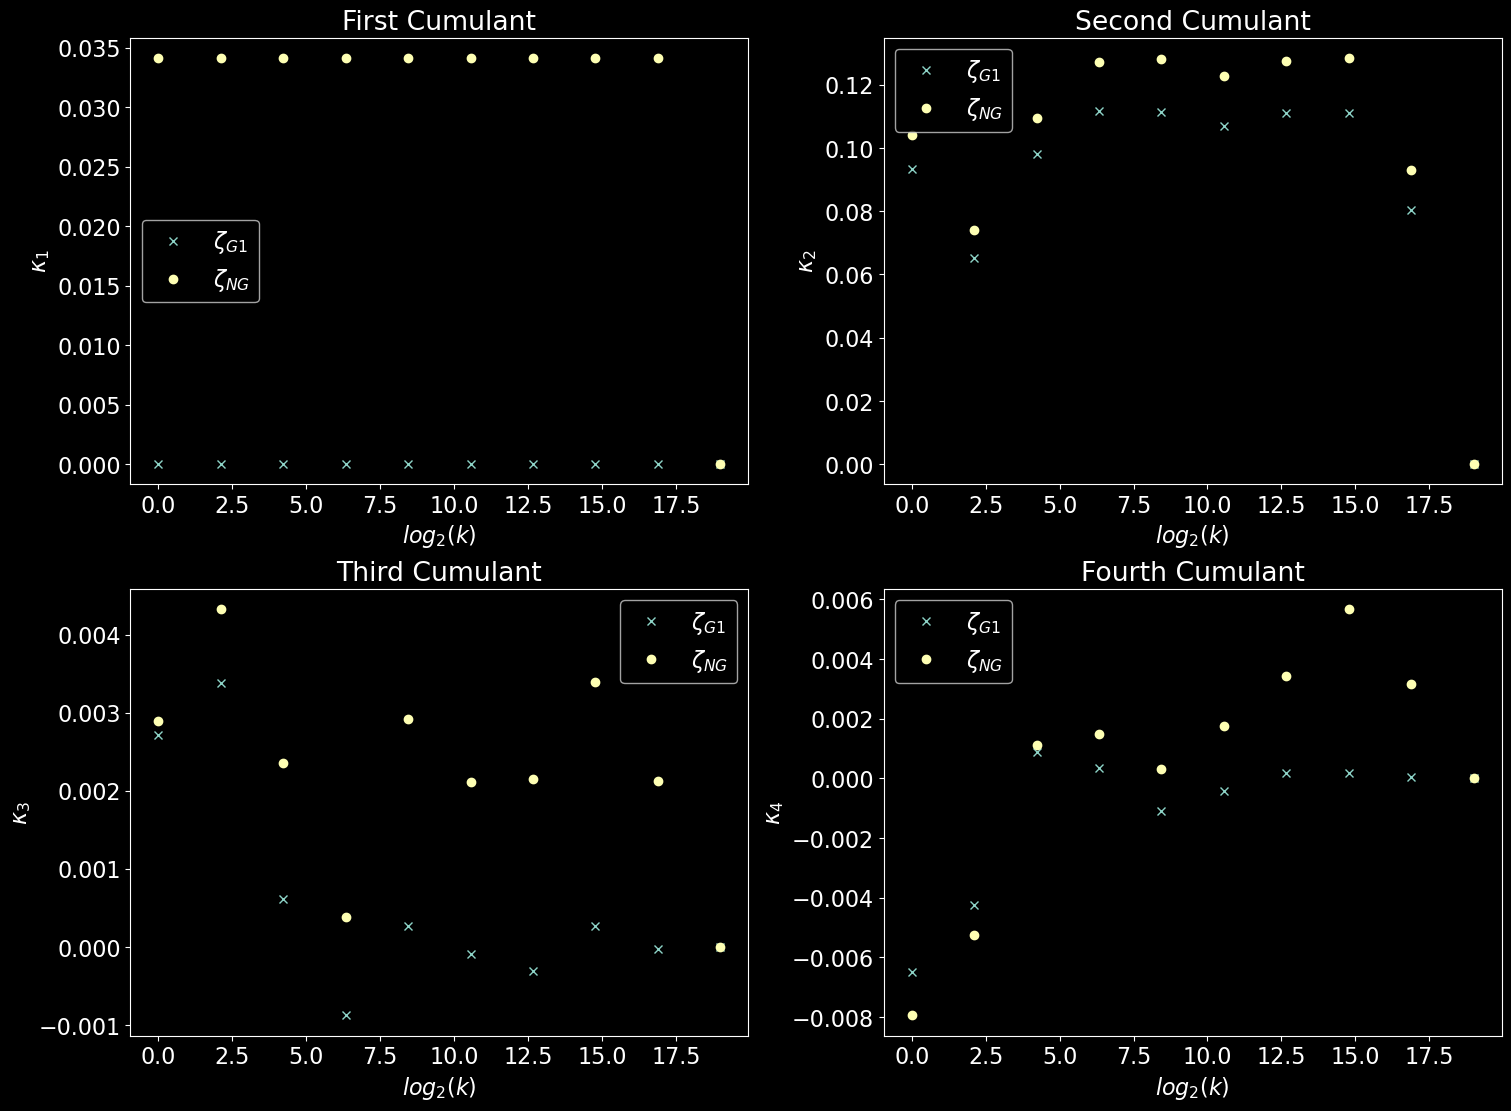

In [49]:
# Plot cumulants for correlated G and NG fields

fig, axs = plt.subplots(2,2,figsize=(15,11), constrained_layout=True)

# fld_g = g
# fld_ng = zeta_NG_asymsinh
cm_xax = np.log2(kc)
gmark = 'x'
ngmark = 'o'

axs[0, 0].set_title(r'First Cumulant')
axs[0, 0].plot(cm_xax, cum1_g, gmark, label=r'$\zeta_{G1}$')
axs[0, 0].plot(cm_xax, cum1_ng, ngmark, label=r'$\zeta_{NG}$')
axs[0, 0].legend(loc='best')

axs[0, 1].set_title(r'Second Cumulant')
axs[0, 1].plot(cm_xax, cum2_g, gmark, label=r'$\zeta_{G1}$')
axs[0, 1].plot(cm_xax, cum2_ng, ngmark, label=r'$\zeta_{NG}$')
axs[0, 1].legend(loc='best')

axs[1, 0].set_title(r'Third Cumulant')
axs[1, 0].plot(cm_xax, cum3_g, gmark, label=r'$\zeta_{G1}$')
axs[1, 0].plot(cm_xax, cum3_ng, ngmark, label=r'$\zeta_{NG}$')
axs[1, 0].legend(loc='best')

axs[1, 1].set_title(r'Fourth Cumulant')
axs[1, 1].plot(cm_xax, cum4_g, gmark, label=r'$\zeta_{G1}$')
axs[1, 1].plot(cm_xax, cum4_ng, ngmark, label=r'$\zeta_{NG}$')
axs[1, 1].legend(loc='best')

k = 1
for ax in axs.flat:
    ax.set(xlabel=r'$log_{2}(k)$', ylabel=r'$\kappa_{{{0}}}$'.format(k))
    k += 1
    
plt.savefig('CorrNG_cum.png')

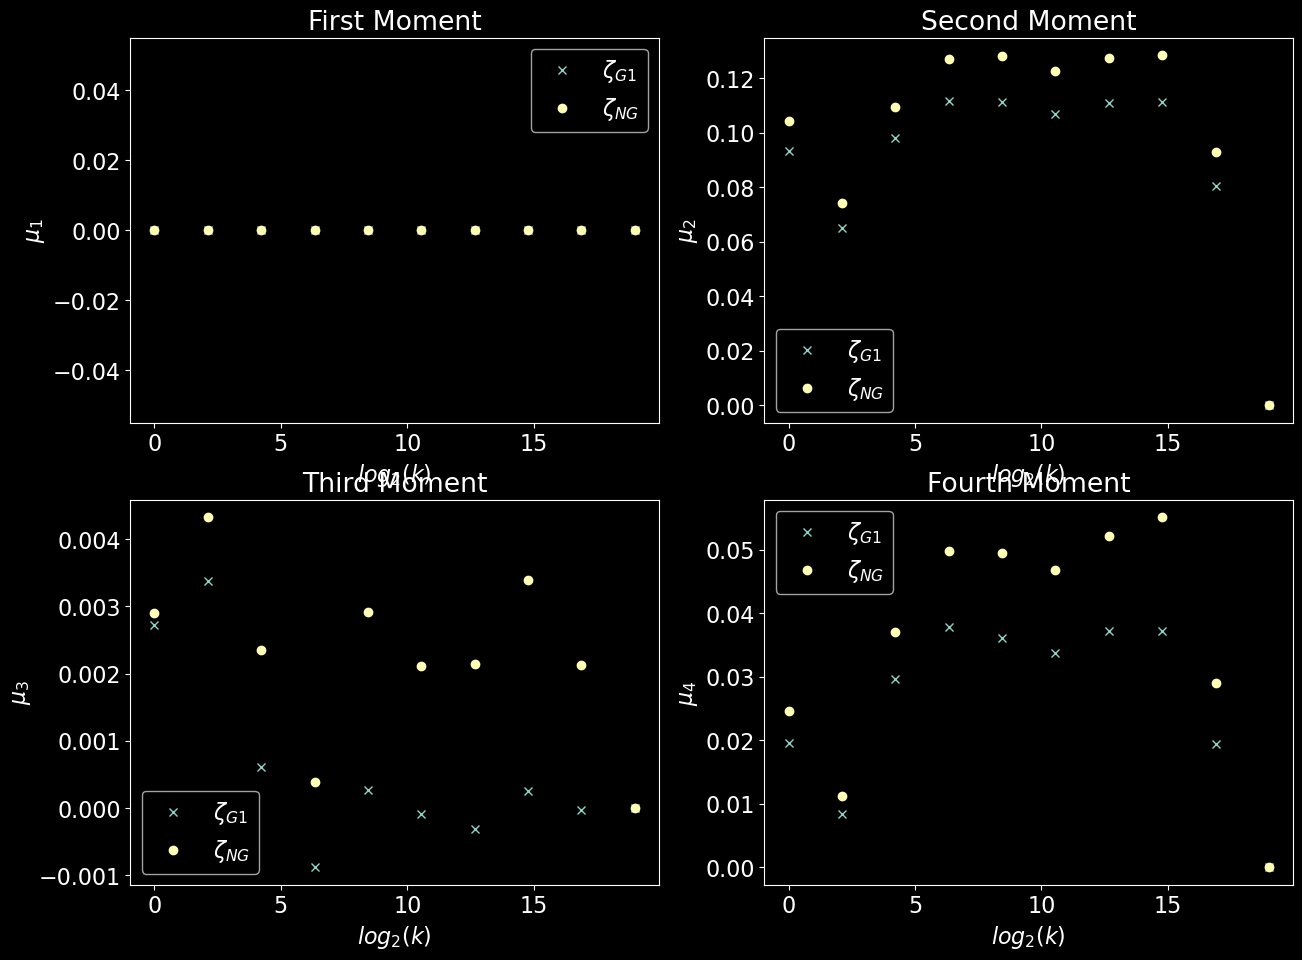

In [50]:
# Plot moments for correlated G and NG fields

fig, axs = plt.subplots(2,2,figsize=(15,11))

# fld_g = g
# fld_ng = zeta_NG_asymsinh
cm_xax = np.log2(kc)
gmark = 'x'
ngmark = 'o'

axs[0, 0].set_title(r'First Moment')
axs[0, 0].plot(cm_xax, mom1_g, gmark, label=r'$\zeta_{G1}$')
axs[0, 0].plot(cm_xax, mom1_ng, ngmark, label=r'$\zeta_{NG}$')
axs[0, 0].legend(loc='best')

axs[0, 1].set_title(r'Second Moment')
axs[0, 1].plot(cm_xax, mom2_g, gmark, label=r'$\zeta_{G1}$')
axs[0, 1].plot(cm_xax, mom2_ng, ngmark, label=r'$\zeta_{NG}$')
axs[0, 1].legend(loc='best')

axs[1, 0].set_title(r'Third Moment')
axs[1, 0].plot(cm_xax, mom3_g, gmark, label=r'$\zeta_{G1}$')
axs[1, 0].plot(cm_xax, mom3_ng, ngmark, label=r'$\zeta_{NG}$')
axs[1, 0].legend(loc='best')

axs[1, 1].set_title(r'Fourth Moment')
axs[1, 1].plot(cm_xax, mom4_g, gmark, label=r'$\zeta_{G1}$')
axs[1, 1].plot(cm_xax, mom4_ng, ngmark, label=r'$\zeta_{NG}$')
axs[1, 1].legend(loc='best')

k = 1
for ax in axs.flat:
    ax.set(xlabel=r'$log_{2}(k)$', ylabel=r'$\mu_{{{0}}}$'.format(k))
    k += 1
    
plt.savefig('CorrNG_mom.png')

## Calculate and plot moments/cumulants for UNCORRELATED NG field

In [51]:
# Smooth the uncorrelated nonG field and calculate cumulants and moments (1 to 4) in each band

# kc = np.arange(1, N//2+1, step=1000)
# kw = np.ones(np.shape(kc)) * 10
kc = np.logspace(0, logtwo_N-1, num=10, base=2.0)
kc_size = kc.size
fld_g = f
fld_ng = zeta_NG_asymsinh_uncorr

cum1_g = np.zeros(np.shape(kc))
cum2_g = np.zeros(np.shape(kc))
cum3_g = np.zeros(np.shape(kc))
cum4_g = np.zeros(np.shape(kc))

cum1_ng = np.zeros(np.shape(kc))
cum2_ng = np.zeros(np.shape(kc))
cum3_ng = np.zeros(np.shape(kc))
cum4_ng = np.zeros(np.shape(kc))

cum1_g_ln = np.zeros(np.shape(kc))
cum2_g_ln = np.zeros(np.shape(kc))
cum3_g_ln = np.zeros(np.shape(kc))
cum4_g_ln = np.zeros(np.shape(kc))

cum1_ng_ln = np.zeros(np.shape(kc))
cum2_ng_ln = np.zeros(np.shape(kc))
cum3_ng_ln = np.zeros(np.shape(kc))
cum4_ng_ln = np.zeros(np.shape(kc))

mom1_g = np.zeros(np.shape(kc))
mom2_g = np.zeros(np.shape(kc))
mom3_g = np.zeros(np.shape(kc))
mom4_g = np.zeros(np.shape(kc))

mom1_ng = np.zeros(np.shape(kc))
mom2_ng = np.zeros(np.shape(kc))
mom3_ng = np.zeros(np.shape(kc))
mom4_ng = np.zeros(np.shape(kc))

mom1_g_ln = np.zeros(np.shape(kc))
mom2_g_ln = np.zeros(np.shape(kc))
mom3_g_ln = np.zeros(np.shape(kc))
mom4_g_ln = np.zeros(np.shape(kc))

mom1_ng_ln = np.zeros(np.shape(kc))
mom2_ng_ln = np.zeros(np.shape(kc))
mom3_ng_ln = np.zeros(np.shape(kc))
mom4_ng_ln = np.zeros(np.shape(kc))

zeta_smooth_gauss = np.zeros((kc_size, N))
zeta_smooth = np.zeros((kc_size, N))
zeta_smooth_ln = np.zeros((kc_size, N))

for i in np.arange(0, kc_size-1):

    zeta_smooth_gauss[i] = flt.window_tophat(fld_g, N, kc[i], kc[i+1])
    zeta_smooth[i] = flt.window_tophat(fld_ng, N, kc[i], kc[i+1])
#     zeta_smooth_ln[i], W_inv = flt.window_tophat_gauss_ln(zeta_NG_asymsinh, N, k, kw[i])
    
    cum1_ng[i] = stats.kstat(zeta_smooth[i], n=1)
    cum1_g[i] = stats.kstat(zeta_smooth_gauss[i], n=1)
    mom1_ng[i] = stats.moment(zeta_smooth[i], moment=1)
    mom1_g[i] = stats.moment(zeta_smooth_gauss[i], moment=1)
    
    cum2_ng[i] = stats.kstat(zeta_smooth[i], n=2)
    cum2_g[i] = stats.kstat(zeta_smooth_gauss[i], n=2)
    mom2_ng[i] = stats.moment(zeta_smooth[i], moment=2)
    mom2_g[i] = stats.moment(zeta_smooth_gauss[i], moment=2)
    
    cum3_ng[i] = stats.kstat(zeta_smooth[i], n=3)
    cum3_g[i] = stats.kstat(zeta_smooth_gauss[i], n=3)
    mom3_ng[i] = stats.moment(zeta_smooth[i], moment=3)
    mom3_g[i] = stats.moment(zeta_smooth_gauss[i], moment=3)
    
    cum4_ng[i] = stats.kstat(zeta_smooth[i], n=4)
    cum4_g[i] = stats.kstat(zeta_smooth_gauss[i], n=4)
    mom4_ng[i] = stats.moment(zeta_smooth[i], moment=4)
    mom4_g[i] = stats.moment(zeta_smooth_gauss[i], moment=4)



x[0] before: 8.178346888598753e-12
x[0] after: 8.178346888598753e-12
x[0] before: 35798.42735193281
x[0] after: 35798.42735193281
x[0] before: 8.178346888598753e-12
x[0] after: 8.178346888598753e-12
x[0] before: 35798.42735193281
x[0] after: 35798.42735193281
x[0] before: 8.178346888598753e-12
x[0] after: 8.178346888598753e-12
x[0] before: 35798.42735193281
x[0] after: 35798.42735193281
x[0] before: 8.178346888598753e-12
x[0] after: 8.178346888598753e-12
x[0] before: 35798.42735193281
x[0] after: 35798.42735193281
x[0] before: 8.178346888598753e-12
x[0] after: 8.178346888598753e-12
x[0] before: 35798.42735193281
x[0] after: 35798.42735193281
x[0] before: 8.178346888598753e-12
x[0] after: 8.178346888598753e-12
x[0] before: 35798.42735193281
x[0] after: 35798.42735193281
x[0] before: 8.178346888598753e-12
x[0] after: 8.178346888598753e-12
x[0] before: 35798.42735193281
x[0] after: 35798.42735193281
x[0] before: 8.178346888598753e-12
x[0] after: 8.178346888598753e-12
x[0] before: 35798.42

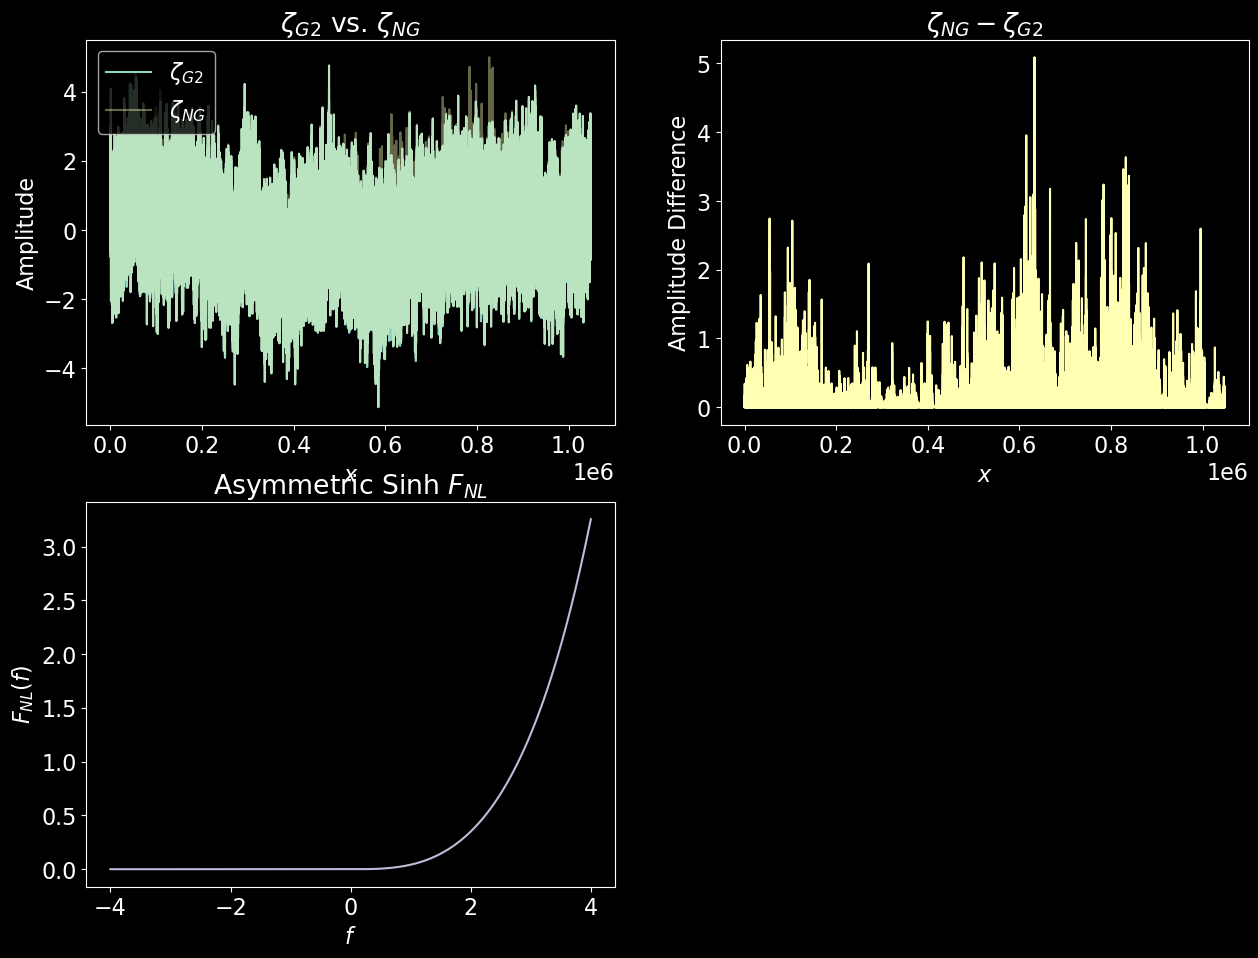

In [52]:
# Plot uncorrelated G field, NG field, and F_nl

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(15,11))

# fld_g = g
# fld_ng = zeta_NG_asymsinh
fld_xax = np.arange(0,N)
fld_diff = zeta_NG_asymsinh - g
transp = 0.4

ax1.set_title(r'$\zeta_{G2}$ vs. $\zeta_{NG}$')
ax1.plot(fld_xax, fld_g, label=r'$\zeta_{G2}$')
ax1.plot(fld_xax, fld_ng, label=r'$\zeta_{NG}$', alpha = transp, color='C1')
ax1.legend(loc='upper left')
ax1.set(xlabel=r'$x$', ylabel="Amplitude")

ax2.set_title(r'$\zeta_{NG} - \zeta_{G2}$')
ax2.plot(fld_xax, fld_diff, color='C1')
ax2.set(xlabel=r'$x$', ylabel="Amplitude Difference")

ax3.set_title("Asymmetric Sinh "r'$F_{NL}$')
ax3.plot(tf, zeta_NG_asymsinh_test, label=r'$\zeta_{NG}$', color='C2')
ax3.set(xlabel=r'$f$', ylabel=r'$F_{NL}(f)$')

ax4.set_visible(False)

plt.savefig('UncorrNG_Fields.png')

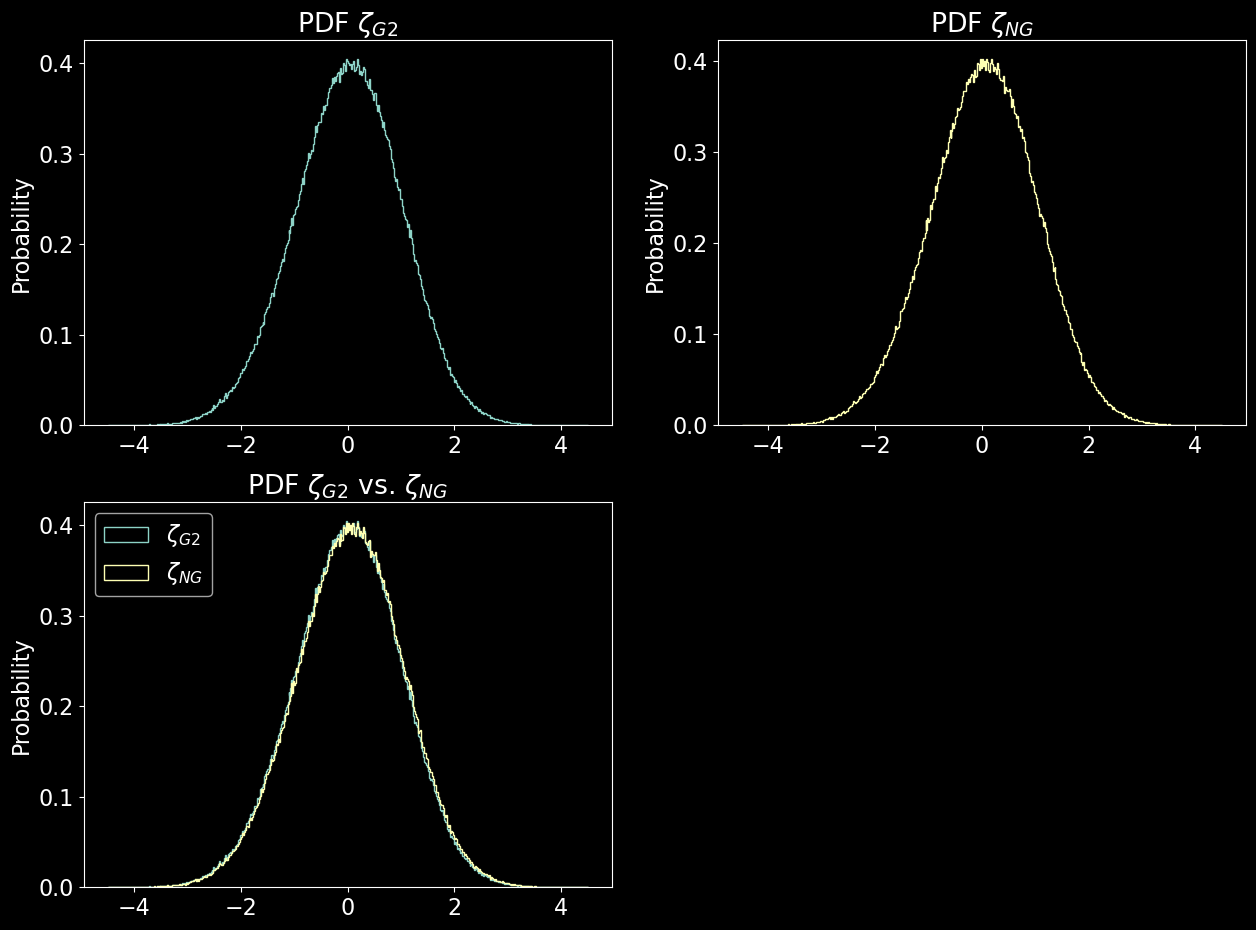

In [53]:
# Plot PDFs for uncorrelated G and NG fields

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(15,11))

# fld_g = g
# fld_ng = zeta_NG_asymsinh
hist_binvalues = np.linspace(-4.5, 4.5, 500)

ax1.set_title(r'PDF $\zeta_{G2}$')
ax1.hist(fld_g, bins=hist_binvalues, density=True, histtype='step')
ax1.set(ylabel="Probability")

ax2.set_title(r'PDF $\zeta_{NG}$')
ax2.hist(fld_ng, bins=hist_binvalues, density=True, histtype='step', color='C1')
ax2.set(ylabel="Probability")

ax3.set_title(r'PDF $\zeta_{G2}$ vs. $\zeta_{NG}$')
ax3.hist(fld_g, bins=hist_binvalues, density=True, label=r'$\zeta_{G2}$', histtype='step')
ax3.hist(fld_ng, bins=hist_binvalues, density=True, label=r'$\zeta_{NG}$', histtype='step', color='C1')
ax3.legend(loc='upper left')
ax3.set(ylabel=r"Probability")

ax4.set_visible(False)

plt.savefig('UncorrNG_PDFs.png')

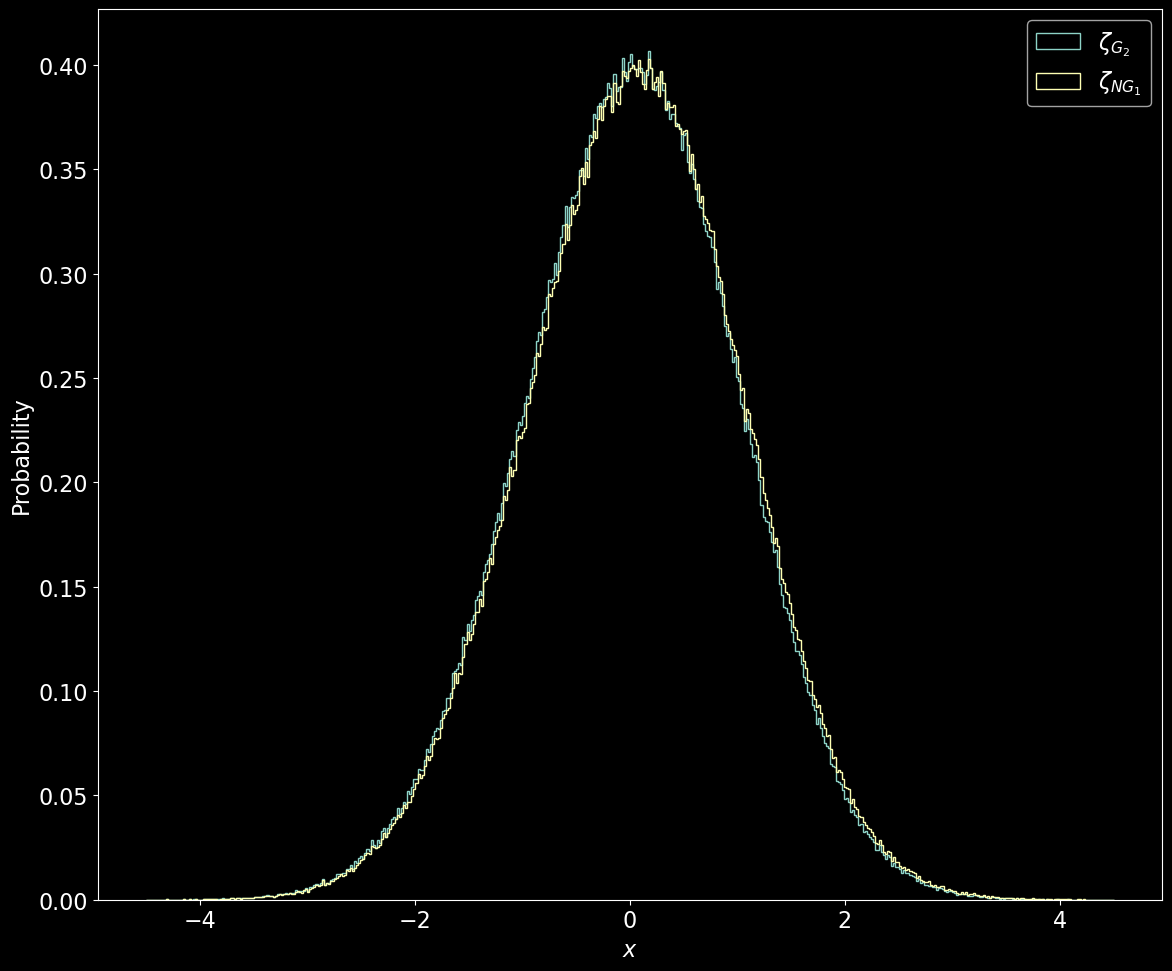

In [54]:
hist_binvalues = np.linspace(-4.5, 4.5, 475)
fig, ax = plt.subplots(1, figsize=(12,10))

ax.hist(fld_g, bins=hist_binvalues, density=True, label=r'$\zeta_{G_2}$', histtype='step')
ax.hist(fld_ng, bins=hist_binvalues, density=True, label=r'$\zeta_{NG_1}$', histtype='step', color='C1')
ax.legend()
ax.set(ylabel=r"Probability")
ax.set(xlabel="$x$")
fig.tight_layout()

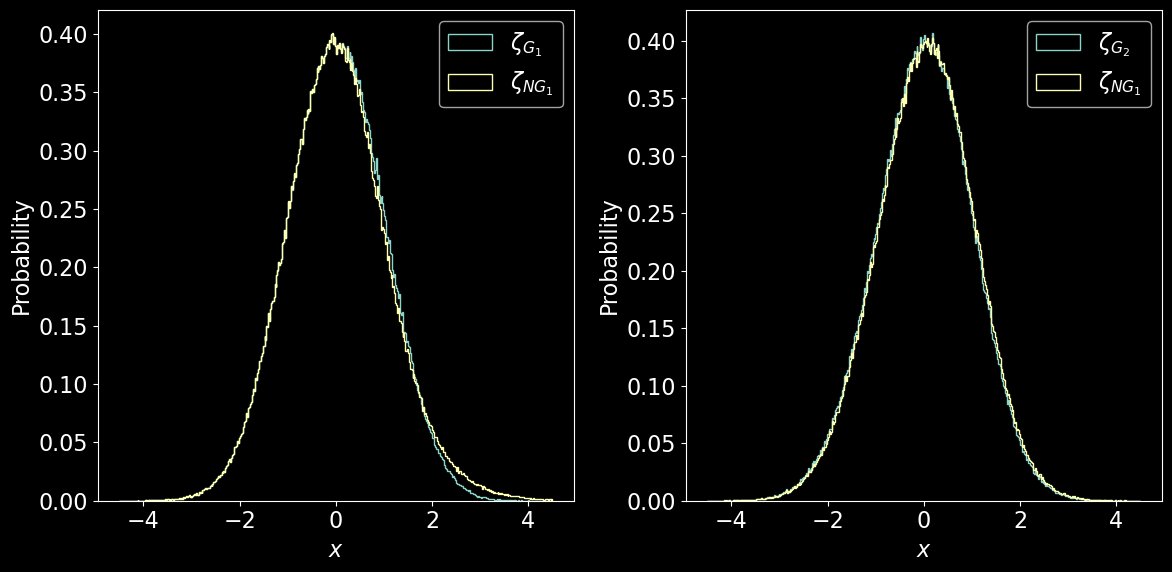

In [55]:
hist_binvalues = np.linspace(-4.5, 4.5, 475)
fig, ax = plt.subplots(1, 2, figsize=(12,6))

ax[0].hist(corr_g, bins=hist_binvalues, density=True, label=r'$\zeta_{G_1}$', histtype='step')
ax[0].hist(corr_ng, bins=hist_binvalues, density=True, label=r'$\zeta_{NG_1}$', histtype='step', color='C1')
ax[0].legend()
ax[0].set(ylabel=r"Probability")
ax[0].set(xlabel="$x$")

ax[1].hist(fld_g, bins=hist_binvalues, density=True, label=r'$\zeta_{G_2}$', histtype='step')
ax[1].hist(fld_ng, bins=hist_binvalues, density=True, label=r'$\zeta_{NG_1}$', histtype='step', color='C1')
ax[1].legend()
ax[1].set(ylabel=r"Probability")
ax[1].set(xlabel="$x$")

fig.tight_layout()

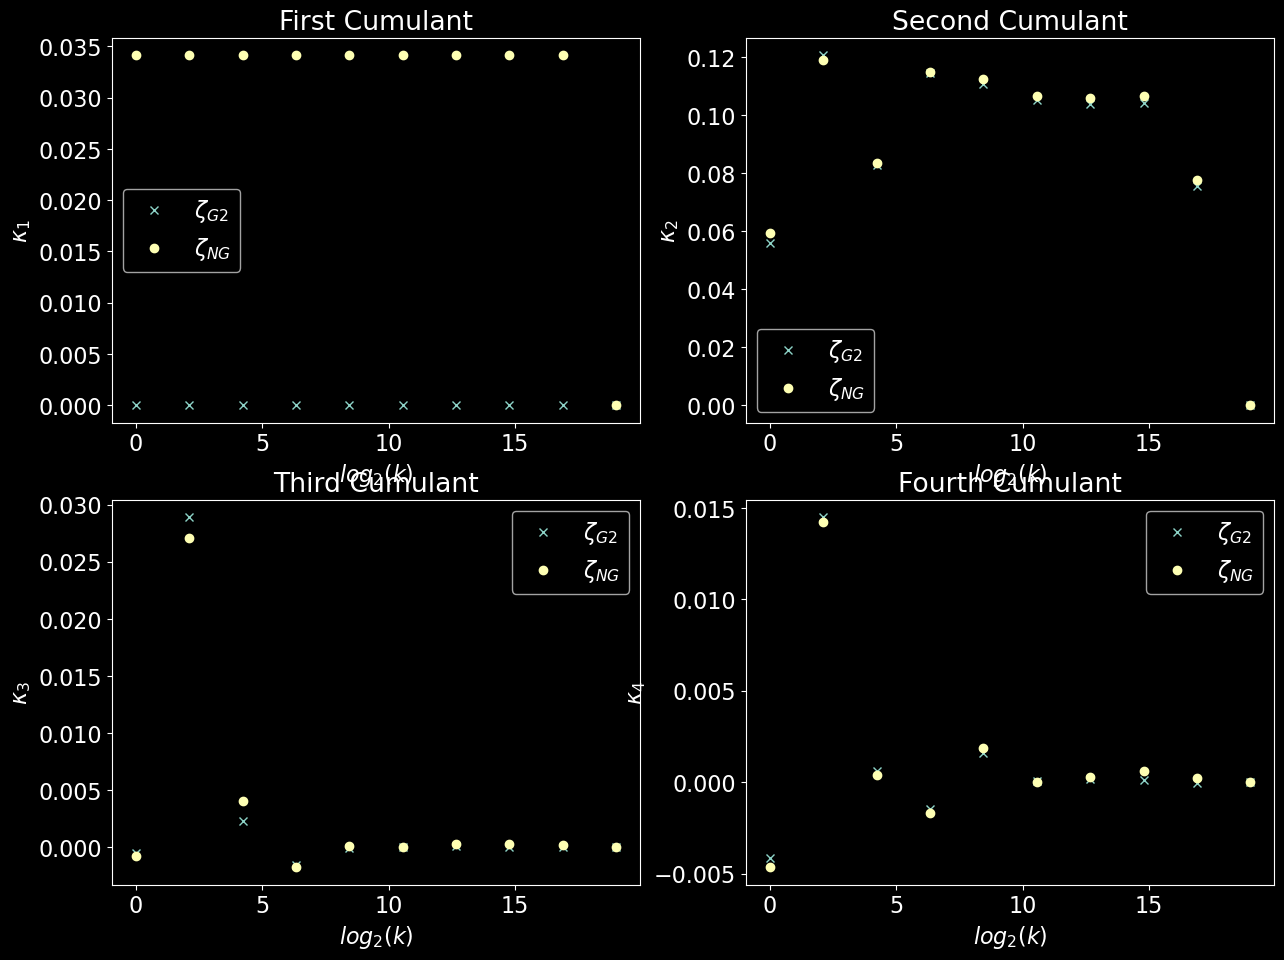

In [56]:
# Plot cumulants for uncorrelated G and NG fields

fig, axs = plt.subplots(2,2,figsize=(15,11))

# fld_g = g
# fld_ng = zeta_NG_asymsinh
cm_xax = np.log2(kc)
gmark = 'x'
ngmark = 'o'

axs[0, 0].set_title(r'First Cumulant')
axs[0, 0].plot(cm_xax, cum1_g, gmark, label=r'$\zeta_{G2}$')
axs[0, 0].plot(cm_xax, cum1_ng, ngmark, label=r'$\zeta_{NG}$')
axs[0, 0].legend(loc='best')

axs[0, 1].set_title(r'Second Cumulant')
axs[0, 1].plot(cm_xax, cum2_g, gmark, label=r'$\zeta_{G2}$')
axs[0, 1].plot(cm_xax, cum2_ng, ngmark, label=r'$\zeta_{NG}$')
axs[0, 1].legend(loc='best')

axs[1, 0].set_title(r'Third Cumulant')
axs[1, 0].plot(cm_xax, cum3_g, gmark, label=r'$\zeta_{G2}$')
axs[1, 0].plot(cm_xax, cum3_ng, ngmark, label=r'$\zeta_{NG}$')
axs[1, 0].legend(loc='best')

axs[1, 1].set_title(r'Fourth Cumulant')
axs[1, 1].plot(cm_xax, cum4_g, gmark, label=r'$\zeta_{G2}$')
axs[1, 1].plot(cm_xax, cum4_ng, ngmark, label=r'$\zeta_{NG}$')
axs[1, 1].legend(loc='best')

k = 1
for ax in axs.flat:
    ax.set(xlabel=r'$log_{2}(k)$', ylabel=r'$\kappa_{{{0}}}$'.format(k))
    k += 1
    
plt.savefig('UncorrNG_cum.png')

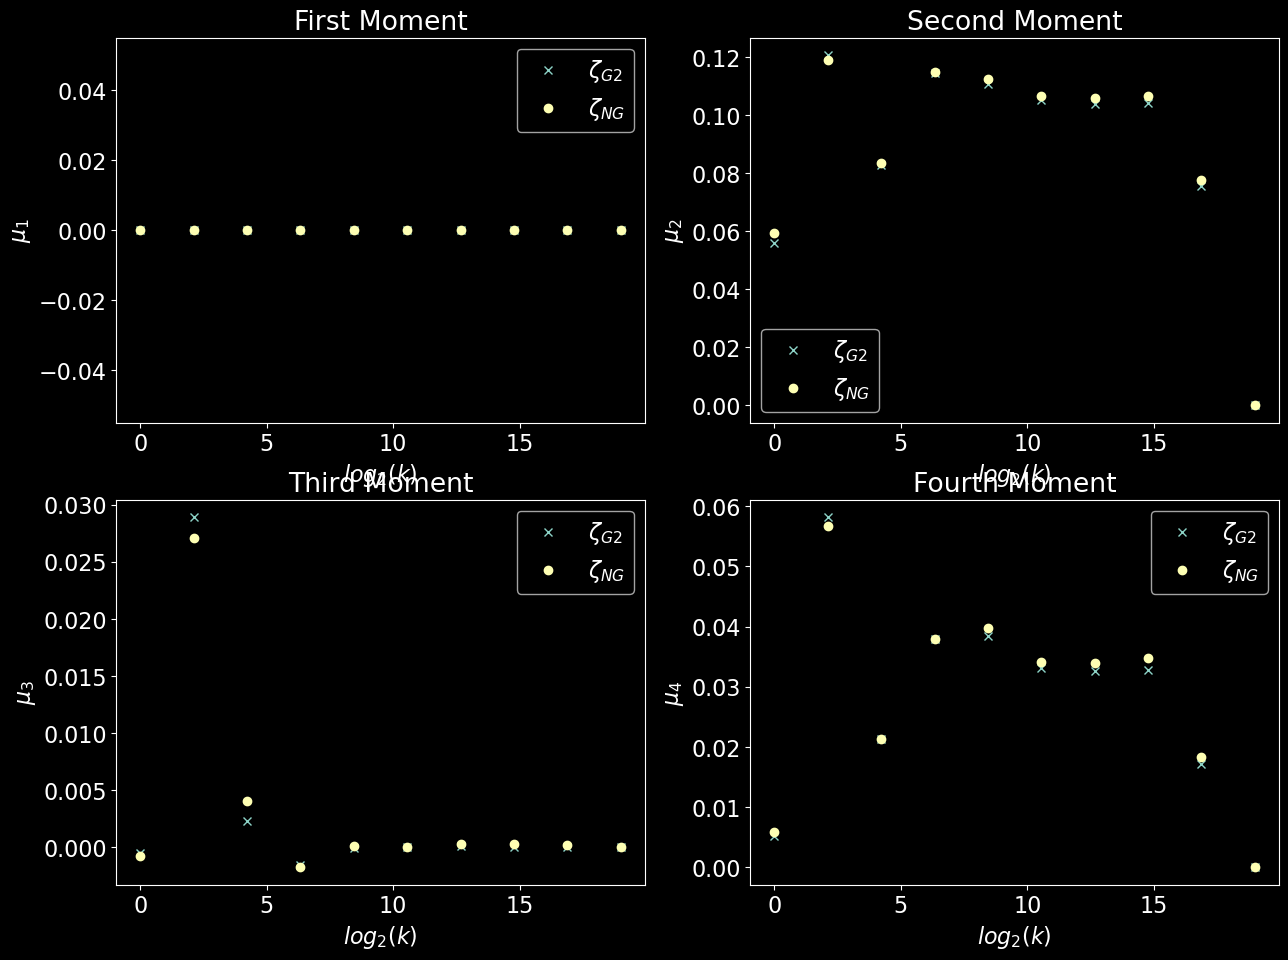

In [57]:
# Plot moments for uncorrelated G and NG fields

fig, axs = plt.subplots(2,2,figsize=(15,11))

# fld_g = g
# fld_ng = zeta_NG_asymsinh
cm_xax = np.log2(kc)
gmark = 'x'
ngmark = 'o'

axs[0, 0].set_title(r'First Moment')
axs[0, 0].plot(cm_xax, mom1_g, gmark, label=r'$\zeta_{G2}$')
axs[0, 0].plot(cm_xax, mom1_ng, ngmark, label=r'$\zeta_{NG}$')
axs[0, 0].legend(loc='best')

axs[0, 1].set_title(r'Second Moment')
axs[0, 1].plot(cm_xax, mom2_g, gmark, label=r'$\zeta_{G2}$')
axs[0, 1].plot(cm_xax, mom2_ng, ngmark, label=r'$\zeta_{NG}$')
axs[0, 1].legend(loc='best')

axs[1, 0].set_title(r'Third Moment')
axs[1, 0].plot(cm_xax, mom3_g, gmark, label=r'$\zeta_{G2}$')
axs[1, 0].plot(cm_xax, mom3_ng, ngmark, label=r'$\zeta_{NG}$')
axs[1, 0].legend(loc='best')

axs[1, 1].set_title(r'Fourth Moment')
axs[1, 1].plot(cm_xax, mom4_g, gmark, label=r'$\zeta_{G2}$')
axs[1, 1].plot(cm_xax, mom4_ng, ngmark, label=r'$\zeta_{NG}$')
axs[1, 1].legend(loc='best')

k = 1
for ax in axs.flat:
    ax.set(xlabel=r'$log_{2}(k)$', ylabel=r'$\mu_{{{0}}}$'.format(k))
    k += 1
    
plt.savefig('UncorrNG_mom.png')

# Independent Component Analysis

$\texttt{sklearn}$ module contains contains a $\texttt{FastICA}$ capability. We can chose the cost function (measure of non-Gaussianity): $\texttt{cube}$ for kurtosis, and $\texttt{logcosh}$ for negentropy approximation.



In [ ]:
from sklearn.decomposition import FastICA
import numpy as np
import matplotlib.pyplot as plt

## Setup for two different linear combinations of same zeta(G) and zeta(NG) 

In [ ]:
# Note that 'g' is the field used to generate the NG component called 'NG_asymsinh', 
# so 'NG_asymsinh' is correlated with 'g', and 'f' is a different Gaussian random 
# field with which the 'NG_asymsinh' is uncorrelated. 

source_g = f
source_ng = NG_asymsinh
size_field = source_g.size

source_components = np.vstack([source_g, source_ng])
num_comps = 2
num_samples = 2

mix_matrix = (1+np.random.random((num_samples,num_comps)))/2.0
mix_signal_pre = np.dot(mix_matrix, source_components)

## Setup for mixtures of zeta(G) and zeta(NG) using different mixing angles

In [ ]:
source_g = f
source_ng = NG_asymsinh
size_field = source_g.size
source_components = np.vstack([source_g, source_ng])

num_comps = 2
num_samples = 2

theta_diff = np.pi
theta_1 = np.pi / 4
theta_2 = theta_1 + theta_diff

mix_1 = [np.cos(theta_1), np.sin(theta_1)]
mix_2 = [np.cos(theta_2), np.sin(theta_2)]
mix_matrix = np.vstack([mix_1, mix_2])

mix_signal_pre = np.dot(mix_matrix, source_components)

# mix_g1 = np.cos(theta_1)
# mix_ng1 = np.sin(theta_1)
# mix_g2 = np.cos(theta_2)
# mix_ng2 = np.sin(theta_2)

# mix_signal_pre = np.vstack([mix_g1*source_g + mix_ng1*source_ng, mix_g2*source_g + mix_ng2*source_ng])

## Setup for dividing zeta(G) + zeta(NG) into two, and treating each half as a separate observed sample

In [ ]:
# Note that 'g' is the field used to generate the NG component called 'NG_asymsinh', 
# so 'NG_asymsinh' is correlated with 'g', and 'f' is a different Gaussian random 
# field with which the 'NG_asymsinh' is uncorrelated. 

source_g = f
source_ng = NG_asymsinh
N = source_g.size

source_g1 = source_g[:N//2]
source_g2 = source_g[N//2:]
source_ng1 = source_ng[:N//2]
source_ng2 = source_ng[N//2:]

size_field = source_g1.size

num_comps = 2
num_samples = 2

mix_signal_pre = np.vstack([source_g1 + source_ng1, source_g2 + source_ng2])

In [ ]:
correlated = False

# plt.figure(figsize=(18,12))

# plt.subplot(221)
# plt.plot(source_g1)

# plt.subplot(222)
# plt.plot(source_g2)

# plt.subplot(223)
# plt.plot(source_ng1)

# plt.subplot(224)
# plt.plot(source_ng2)

## Preprocess the fields

In [ ]:
# Sample 1
sample1_pre = mix_signal_pre[0, :]
m1 = np.mean(sample1_pre)
sample1_ms = sample1_pre - m1

sample1_ft = np.fft.fft(sample1_ms)
sample1_sqrtpower = np.absolute(sample1_ft)

sample1_ms_white_ft = sample1_ft / sample1_sqrtpower * (size_field**(1/2))

sample1 = np.fft.ifft(sample1_ms_white_ft).real

# Sample 2
sample2_pre = mix_signal_pre[1, :]
m2 = np.mean(sample2_pre)
sample2_ms = sample2_pre - m2

sample2_ft = np.fft.fft(sample2_ms)
sample2_sqrtpower = np.absolute(sample2_ft)

sample2_ms_white_ft = sample2_ft / sample2_sqrtpower * (size_field**(1/2))

sample2 = np.fft.ifft(sample2_ms_white_ft).real

# Gaussian
mg = np.mean(source_g)
gauss_ms = source_g - mg

gauss_ft = np.fft.fft(gauss_ms)
gauss_sqrtpower = np.absolute(gauss_ft)

gauss_ms_white_ft = gauss_ft / gauss_sqrtpower * (size_field**(1/2))

gauss_white = np.fft.ifft(gauss_ms_white_ft).real

# Mix the samples back again
mix_signal = np.vstack([sample1, sample2])

# plt.figure(figsize=(18,5))
# plt.plot(sample1)

# plt.figure(figsize=(18,5))
# plt.plot(sample2)